<div style="background-color:#FFB6C1">

# Labeling Effectiveness and WTP for Coffee Labels 
    
# Xingyu Wang

![](https://thumbs.gfycat.com/AcclaimedZestyFantail-size_restricted.gif)

In [1]:
import pymc as pm
import numpy as np
import aesara.tensor as T
import matplotlib.pyplot as plt
import pandas as pd

<div style="background-color:#FFF0F5">
    
# 1 Introduction

According to OEC (The Observatory of Economic Complexity), coffee were around the world's 124th most traded products in 2021, with a total trade of 36 billion dollars. With such a huge amount of trading capacity, the producers retain 10% of the retail coffee price. With Many coffee products are produced in developing countries such as Brazil and Vietnam. As the coffee production procedures become more mature, these coffee products are sold with different labels in developed countries; the labels helps indicate sustainable or environmental friendly productions. 

The research for labeling effects is quite important because it helps understand whether the coffee labels help with the consumption of sustainable products. Specifically, the paper considers three different labeling effect on coffee. The first label is Certified Bio label, which is designed to provide biobased information to consumers. Bio-based coffee is coffee that is produced using sustainable agricultural practices and is derived from renewable biomass sources, such as coffee plants. The second label is "Fair-Trade" label, which concerns the sustainability and the working envirnoment of coffee production. The Fairtrade label guarantees that products, such as coffee, tea, chocolate, and other commodities, are produced in a way that supports fair prices, living wages, and safe working conditions for farmers and workers in developing countries. The third label 'certified_wild' indicates whether the coffe is wildly grown. Mainly, wild grown coffee label indicates that coffee was grown in natural environment (rainforests) with none or little human internvention (perfect daily grind). In general, by assigning single or multiple labels to a coffee in the qustionnaire under a multiple setting, the research is able to investigate consumers' willingness to pay for different labels in a more complicated setting, where more than one labels can appear on a product. 

There has been many past research on consumer demand for ethical product. However, most focus on one specific label. The effect of "fair trade" label is intensively studied. The piror research shows that labels usually positively influence consumers' willingness to pay for ethically sourced products. With the increasing number of labeling options available in the market, it is important to examine the effectiveness of different labels and how they interact with each other. This research uses data collected by choice experiment from 141 participants in Germany. By using a multiple label setting, this research aims to investigate consumers' decision making when multiple labels exist.



<div style="background-color:#FFF0F5">
    
# 2 Literature Review

There are numerous research projects on consumer willingness to pay and labeling effects on various commodities like coffee, milk, candy, t-shirt. 
A survey in 1999 by the Program on International Policy Attitudes found out that around 75% of respondents indicated they were willing to pay 25 dollars for a 20 dollars garment that was certified as not being made in a sweatshop. Past research from National Bureau of Economic Research discovered that about 80% surveyed participants said they were willing to pay more for a product if labeled as good working environment. 

Daniel Wikstrom did a choice experiment on willingness to pay for sustainable coffee. The research focuses on KARV-dertification and Fair-trade_certification. The study shows that individuals participate in non-profit organizations are more willing to pay for Fiar-trade labels. The questionnaire design is quite different from the one used in the paper. It presents two alternatives in each question and every participant must make a choice between the two. This research  aims to suggest producers how they shoudl price coffee products and inclue different labels. 

Another paper 'Consumer demand for fair trade: evidence from a multistore field experiment' revealed that some price-sensitive shoppers may be less willing to pay for the labels. In other words, there are large heterogeneity in consumer willingness to pay for ethical labels. Thus, in this research, it is useful to examine the model considering such heterogeneity through participants' income level. 
    In general, most studies on consumers WTP show that consumers are willing to pay a price premium on labled coffee; however, the scale of such price premium is different across groups and depends on the specific context and coffee information.
          
This paper is different from the past research from mainly two aspects. First, most research on labelling effects aim to provide suugestions to firm-level marketing strategies based on ethical labels. However, this research focus on consumer decision making and intend to investigates the effectiveness of ethical labels to help with sustainable coffee production. Second, most past research took a frequentist approach which fail give useful information about how different groups of consumers can have WTP drawn from different posteriors. This study considers consumers within and among different income, education, age, and gender groups, and will discover the best model to discover the labeling effect and consumers WTP for different labels, allowing heterogeneity among consumers.
    

<div style="background-color:#FFF0F5">

# 3 Data Source

All datat used are primary data colleced through a choice experiment. The data was collected under an experimental setting from 141 participants in Germany. Coffee has been very essential for German culture for over hundreds of years. While coffee shops and acfes ae popular, Germans also consume a grat amount of coffee at home. According to recent statistics, Germany ranks 11th globally in coffee consumption, with an average of 6.5 kilograms consumed per capita yearly. Thus, choosing the questionnaire based in Germany makes more since the coffee markets and labels are more established in Germany.  

The questionnaire contains three types of questions: (1) personal coffee preferences and knowledge about existing lables (2) 6 questions about coffee choice for 18 different coffees with different labels, origins, and price for each coffee (3) personal education, age, and income information. 



In [2]:
coffee = pd.read_csv('coffee_m.csv')
coffee.head()

index  certified_bio  certified_fair_trade  certified_wild  id  \
0      0              0                     0               0   1   
1      0              1                     0               1   1   
2      1              0                     0               0   1   
3      2              1                     1               0   1   
4      4              1                     0               1   1   

   origin_brazil  origin_ethiopian  origin_none  version  choice  ...  q18d  \
0              0                 0            0        1       1  ...     0   
1              0                 1            0        1       0  ...     0   
2              0                 1            0        1       0  ...     0   
3              0                 0            1        1       0  ...     0   
4              0                 1            0        1       0  ...     0   

   q18e  q19a  q19b  q19c  q19d  q19e  edu  age  income  
0     0     1     0     0     0     0    0    0       0  
1     0     1     0     0     0     0    0    0       0  
2     0     1     0     0     0     0    0    0       0  
3     0     1     0     0     0     0    0    0       0  
4     0     1     0     0     0     0    0    0       0  

[5 rows x 57 columns]

<div style="background-color:#FFF0F5">

Note: 1= not well known, 2= not known, 3= known, 4= well known

Text(0.5, 1.0, 'Histogram of Familarity to bio (organic) coffee')

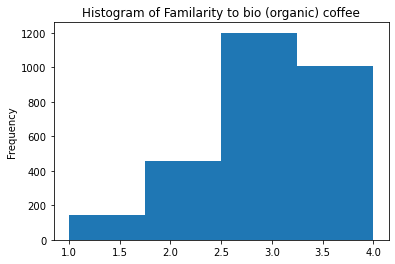

In [3]:
coffee['q2a'].plot.hist(bins = 4)
plt.title("Histogram of Familarity to bio (organic) coffee")

Text(0.5, 1.0, 'Histogram of Familarity to fair trade coffee')

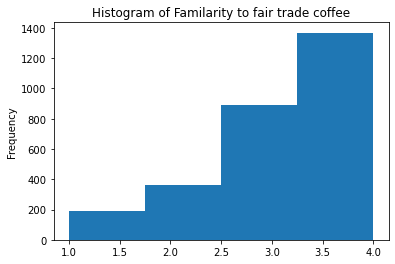

In [4]:
coffee['q2b'].plot.hist(bins = 4)
plt.title("Histogram of Familarity to fair trade coffee")

Text(0.5, 1.0, 'Histogram of Familarity to wild coffee')

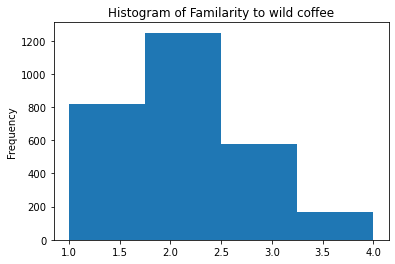

In [5]:
coffee['q2c'].plot.hist(bins = 4)
plt.title("Histogram of Familarity to wild coffee")

<div style="background-color:#FFF0F5">

The three histograms above show to what extent are consumers familiar with the bio, fair trade, and wild labels. The histograms tell that most consumers are familiar with bio and fair trade labels while less are familiar with the wild grown label. Thus, we may expect a lower willingness to pay for wild labels. 

<div style="background-color:#F4C2C2">

# 4 Econometric Model


The coefficients on label dummies (Certified_BIO, Certified_Fair_Trade, Certified_wild) are the variable of interest.
The utility function for a certain coffee $k$ is:

$$V_k = \beta_{none}(Origin None_k == 1)+ \beta_{ethi}( Ethiopia_k ==1)+  \beta_{braz}( Brazil_k == 1)+\beta_{price}(price_k) + \beta_{fair}(Fair Trade == 1)+ \beta_{bio}(BIO_k == 1)+\beta_{wild}(Wild_k == 1)+ \epsilon_k$$
    

All variables that remain constant accross questions for an individual/ same ID will be eliminated when calculating the conditional logit likelihood. Thus, it does not make sense to include a constant term in the model. 

Five models are considered and compared in this paper. The first four models are hierarchical models group by income, education, age, gender respectively. The last model is an pooled model. The consumer personal information (income, education, age, gender) are considered in the hierarchical models, which will captures the heterogeneity within different consumer groups. The result is sampled using Bayesian model, by taking a Monte Carlo Markov Chain of the posterior distribution. I assume Five models will be compared using WAIC criteria at last and choose the best fit model.

Note: I initially considered the two-way effects when multiple labels appear on one coffee. However, the sampling process takes too long and it is hard to run four hierarchical uncentered model. Thus, I only included single label effect below; the model considered two-way effect is specified as: $V_k = \beta_{none}(Origin None_k == 1)+ \beta_{ethi}( Ethiopia_k ==1)+  \beta_{braz}( Brazil_k == 1)+\beta_{price}(price_k) + \beta_{fair}(Fair Trade == 1)+ \beta_{bio}(BIO_k == 1)+\beta_{wild}(Wild_k == 1)+\beta_{fair+bio}(Fair Trade_k == 1)(BIO_k == 1)+\beta_{fair+wild}(Fair Trade_k == 1)(Wild_k == 1)+\beta_{bio+wild}(BIO_k == 1)(Wild_k == 1) + \epsilon_k$


<div style="background-color:#F4C2C2">


### 4.1 Variable Specification

1. Label dummies
* certified_bio: ==1 if the coffee has a certified_bio label
* certified_fair_trade: ==1 if the coffee has a certified_fair_trade label
* certified_wild: ==1 if the coffee has a certified_wild label
    
Note that a coffee choice can have more than one label.
    
2. Origin (Control variable)
* origin_brazil
* origin_ethiopian 
* origin_none
* The other default origin is Columbia.

3. Dependent variable
* Choice (Probability) 
    
4. Hierarchical model groups:
* income: annual household income. 0= below 5000, 1= 5000-15000, 2= 15000-30000, 3= 30000-50000, 5= over 50000
* education: highest degree, 0= high school, 2= Bachelor, 3= PhD, 4= Graduate degree, 5= other
* age: 0= 16 to 25, 1= 26 to 35, 2= 36 to 45, 3= 46 to 55, 5= over 55 
* gender: 1= male, 0= female

<div style="background-color:#F4C2C2">


All variables constant accross questions for an individual/ same ID will be eliminated when calculating the conditional logit likelihood. Thus, it does not make sense to include a constant term in the model. The prior and hyperprior are set as Normal and HalfCauchy. The normal priors centered at zero. The reason for choosing normal prior for mu is that coefficients on WTP for labels, origins, and price effect could be positive or negative.



<div style="background-color:#F4C2C2">

### 4.2 Willingness to pay
    
To measure the willingness to pay, I refer to the marginal utility function. Thus, the WTP is calculated as $$-\frac{\Delta {\beta_{label_i}}}{\Delta {\beta_{price}}}$$that is, the change in label parameter divided by change in price parameter. We add the negative sign because as price increase, willingness to pay will decrease. WTP is only calculated in the pooled model and the best model under waic criteria.

In [6]:
# Create index:
rows_per_group = 4    
# Calculate the number of groups
num_groups = len(coffee) // rows_per_group
# Create the index list
choice_index = np.array([i // rows_per_group for i in range(len(coffee))])

<div style="background-color:#FFF0F5">


### 4.3.1 Model by income

In [7]:
with pm.Model() as hierarchical_model_income:
    
    
    # Hyperprior
    mu_bio = pm.Normal('mu_bio', mu=0., sigma=5)
    sigma_bio = pm.HalfCauchy('sigma_bio', beta=1)
    mu_ft = pm.Normal('mu_ft', mu=0., sigma=5)
    sigma_ft = pm.HalfCauchy('sigma_ft', beta=1)
    mu_wild = pm.Normal('mu_wild', mu=0., sigma=5)
    sigma_wild = pm.HalfCauchy('sigma_wild', beta=1)
    mu_p = pm.Normal('mu_p', mu=0., sigma=5)
    sigma_p = pm.HalfCauchy('sigma_p', beta=1)
    
    # Prior distributions for the parameters
    beta_none = pm.Normal('beta_none', mu=0., sigma=5.)
    beta_ethi = pm.Normal('beta_ethi', mu=0., sigma=5.)
    beta_braz = pm.Normal('beta_braz', mu=0., sigma=5.)

    #Colombia as standardized
    beta_bio_offset = pm.Normal('beta_bio_offset',mu = 0., sigma = 1., shape = len(coffee.income.unique())) 
    beta_bio = pm.Deterministic('beta_bio', mu_bio+sigma_bio*beta_bio_offset)
    
    beta_fair_offset = pm.Normal('beta_fair_offset',mu = 0., sigma = 1., shape = len(coffee.income.unique())) 
    beta_fair = pm.Deterministic('beta_fair', mu_ft+sigma_ft*beta_fair_offset)
    
    beta_wild_offset = pm.Normal('beta_wild_offset',mu = 0., sigma = 1., shape = len(coffee.income.unique())) 
    beta_wild = pm.Deterministic('beta_wild', mu_wild+sigma_wild*beta_wild_offset)
    
    beta_price_offset = pm.Normal('beta_price_offset',mu = 0., sigma = 1., shape = len(coffee.income.unique())) 
    beta_price = pm.Deterministic('beta_price', mu_p+sigma_p*beta_price_offset)
    
    def loglike(choice, beta_braz, beta_ethi, beta_none, beta_bio, beta_fair, beta_wild, beta_price):
        
        V = beta_braz*coffee['origin_brazil']+ beta_ethi*coffee['origin_ethiopian']+ beta_none*coffee['origin_none']\
            +beta_bio[coffee.income] * coffee['certified_bio'] + beta_fair[coffee.income] * coffee['certified_fair_trade']+ beta_wild[coffee.income] * \
            coffee['certified_wild']+ beta_price[coffee.income] * coffee['price']
    
        exp_v = T.exp(V)
        choice_exp_v = choice*exp_v
                  
        denom = T.bincount(choice_index, weights = exp_v) 
        num = T.bincount(choice_index, weights = choice_exp_v) 
        
        prob = num/denom
        loglike = T.sum(T.log(prob))
        return loglike
        
    choice_like = pm.DensityDist('logit', beta_braz, beta_ethi, beta_none, beta_bio,
                    beta_fair, beta_wild, beta_price, logp=loglike, observed=coffee.choice)

In [8]:
with hierarchical_model_income:
    income_hierarchical_trace = pm.sample(tune=6000, target_accept=.95,return_inferencedata= True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_bio, sigma_bio, mu_ft, sigma_ft, mu_wild, sigma_wild, mu_p, sigma_p, beta_none, beta_ethi, beta_braz, beta_bio_offset, beta_fair_offset, beta_wild_offset, beta_price_offset]


Sampling 2 chains for 6_000 tune and 1_000 draw iterations (12_000 + 2_000 draws total) took 339 seconds.


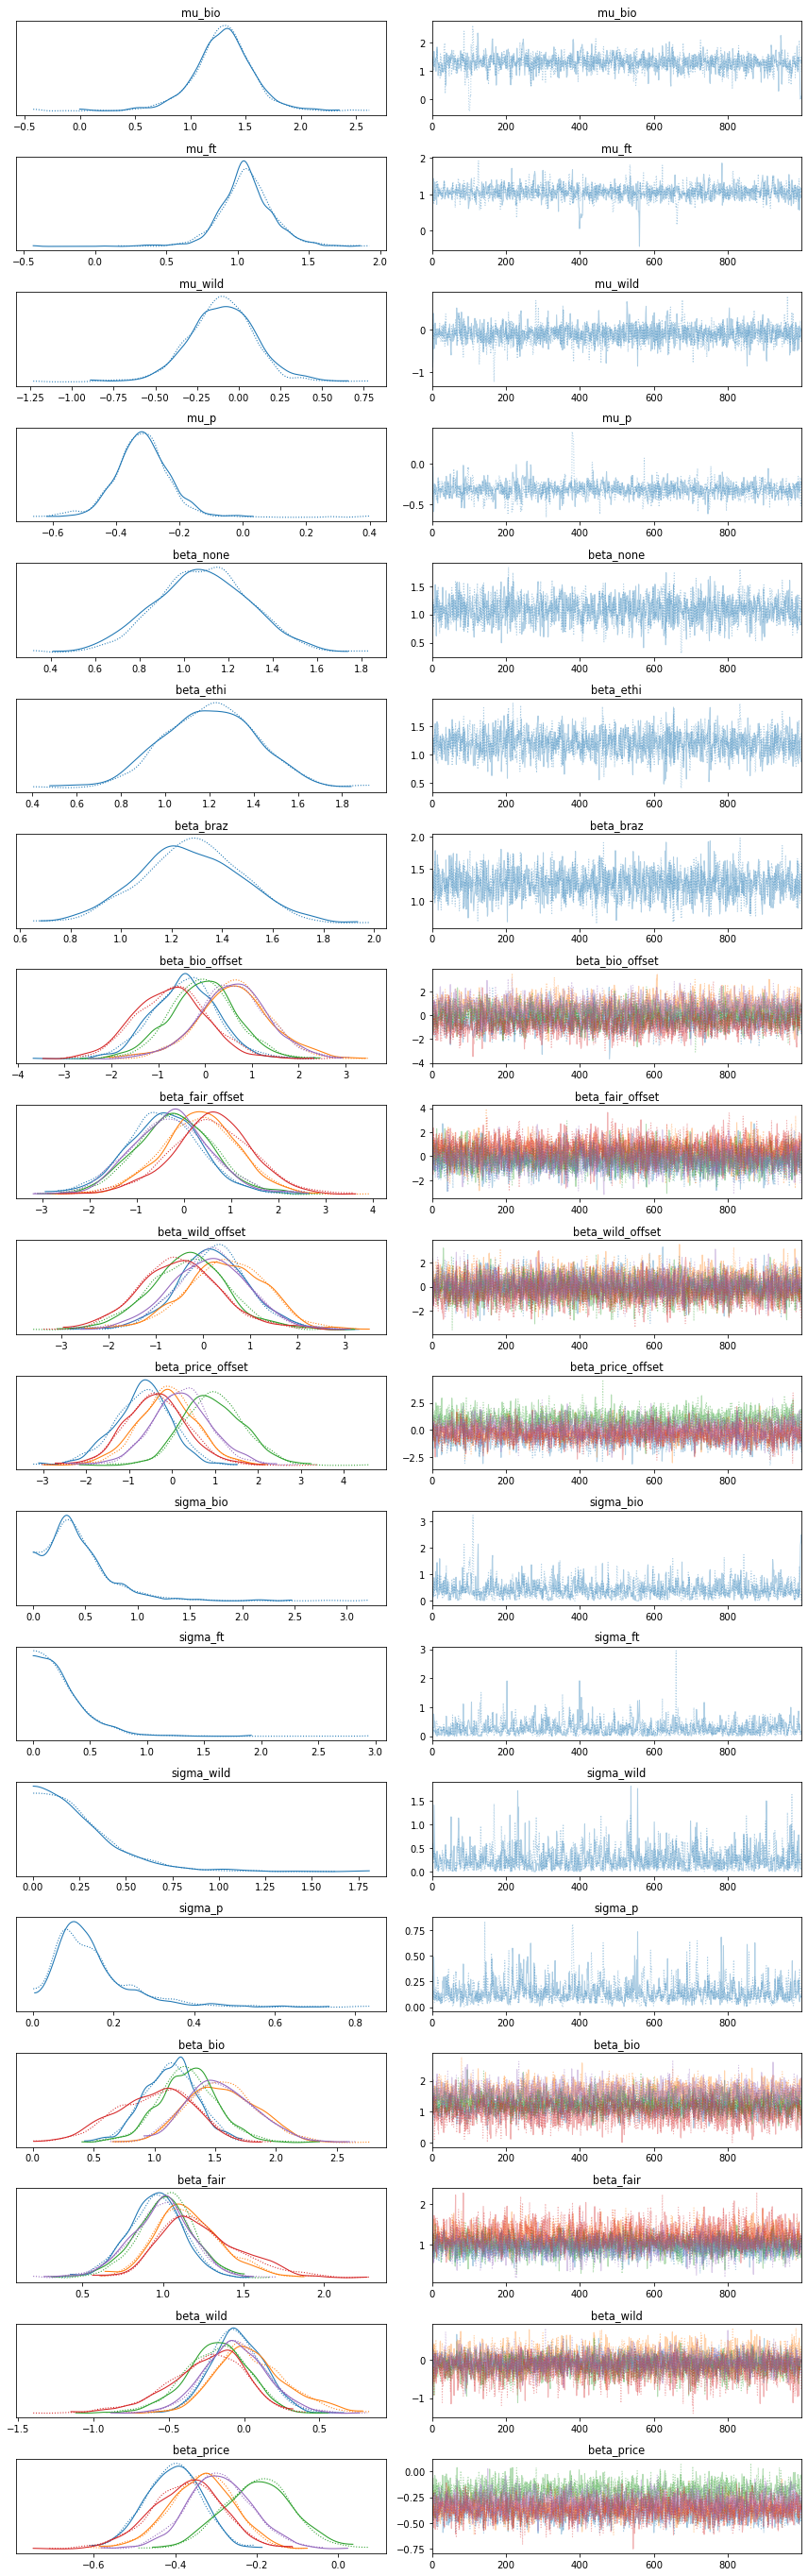

In [9]:
pm.plot_trace(income_hierarchical_trace);
plt.tight_layout()

In [10]:
#pm.summary(income_hierarchical_trace)

<div style="background-color:#F4C2C2">

Notice: The summary and rhat are included at the end of the paper for space concern. They all show convergence in rhat.

<div style="background-color:#FFF0F5">


### 4.3.2 Model by education

In [11]:
with pm.Model() as hierarchical_model_educ:
    
    # Hyperprior
    mu_bio = pm.Normal('mu_bio', mu=0., sigma=5)
    sigma_bio = pm.HalfCauchy('sigma_bio', beta=1)
    mu_ft = pm.Normal('mu_ft', mu=0., sigma=5)
    sigma_ft = pm.HalfCauchy('sigma_ft', beta=1)
    mu_wild = pm.Normal('mu_wild', mu=0., sigma=5)
    sigma_wild = pm.HalfCauchy('sigma_wild', beta=1)
    mu_p = pm.Normal('mu_p', mu=0., sigma=5)
    sigma_p = pm.HalfCauchy('sigma_p', beta=1)
    
    # Prior distributions for the parameters
    # intercept = pm.Normal('intercept', mu=0., sigma=10.)  # intercepts don't make sense in this model unless you only turn it on for the "no coffee option"
    beta_none = pm.Normal('beta_none', mu=0., sigma=5.)
    beta_ethi = pm.Normal('beta_ethi', mu=0., sigma=5.)
    beta_braz = pm.Normal('beta_braz', mu=0., sigma=5.)
    
    
    #Colombia as standardized
    beta_bio_offset = pm.Normal('beta_bio_offset',mu = 0., sigma = 1., shape = len(coffee.edu.unique())) 
    beta_bio = pm.Deterministic('beta_bio', mu_bio+sigma_bio*beta_bio_offset)
    
    beta_fair_offset = pm.Normal('beta_fair_offset',mu = 0., sigma = 1., shape = len(coffee.edu.unique())) 
    beta_fair = pm.Deterministic('beta_fair', mu_ft+sigma_ft*beta_fair_offset)
    
    beta_wild_offset = pm.Normal('beta_wild_offset',mu = 0., sigma = 1., shape = len(coffee.edu.unique())) 
    beta_wild = pm.Deterministic('beta_wild', mu_wild+sigma_wild*beta_wild_offset)
    
    beta_price_offset = pm.Normal('beta_price_offset',mu = 0., sigma = 1., shape = len(coffee.edu.unique())) 
    beta_price = pm.Deterministic('beta_price', mu_p+sigma_p*beta_price_offset)
    
    def loglike(choice, beta_braz, beta_ethi, beta_none, beta_bio, beta_fair, beta_wild, beta_price):
        
        V = beta_braz*coffee['origin_brazil']+ beta_ethi*coffee['origin_ethiopian']+ beta_none*coffee['origin_none']\
            +beta_bio[coffee.edu] * coffee['certified_bio'] + beta_fair[coffee.edu] * coffee['certified_fair_trade']+ beta_wild[coffee.edu] * \
            coffee['certified_wild']+ beta_price[coffee.edu] * coffee['price']
    
        exp_v = T.exp(V)
        choice_exp_v = choice*exp_v
                  
        denom = T.bincount(choice_index, weights = exp_v) 
        num = T.bincount(choice_index, weights = choice_exp_v) 
        
        prob = num/denom
        loglike = T.sum(T.log(prob))
        return loglike
        
    choice_like = pm.DensityDist('logit', beta_braz, beta_ethi, beta_none, beta_bio,
                    beta_fair, beta_wild, beta_price, logp=loglike, observed=coffee.choice)

In [16]:
with hierarchical_model_educ:
    educ_hierarchical_trace = pm.sample(tune=6000, target_accept=.95, return_inferencedata= True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_bio, sigma_bio, mu_ft, sigma_ft, mu_wild, sigma_wild, mu_p, sigma_p, beta_none, beta_ethi, beta_braz, beta_bio_offset, beta_fair_offset, beta_wild_offset, beta_price_offset]


Sampling 2 chains for 6_000 tune and 1_000 draw iterations (12_000 + 2_000 draws total) took 331 seconds.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9063, but should be close to 0.95. Try to increase the number of tuning steps.


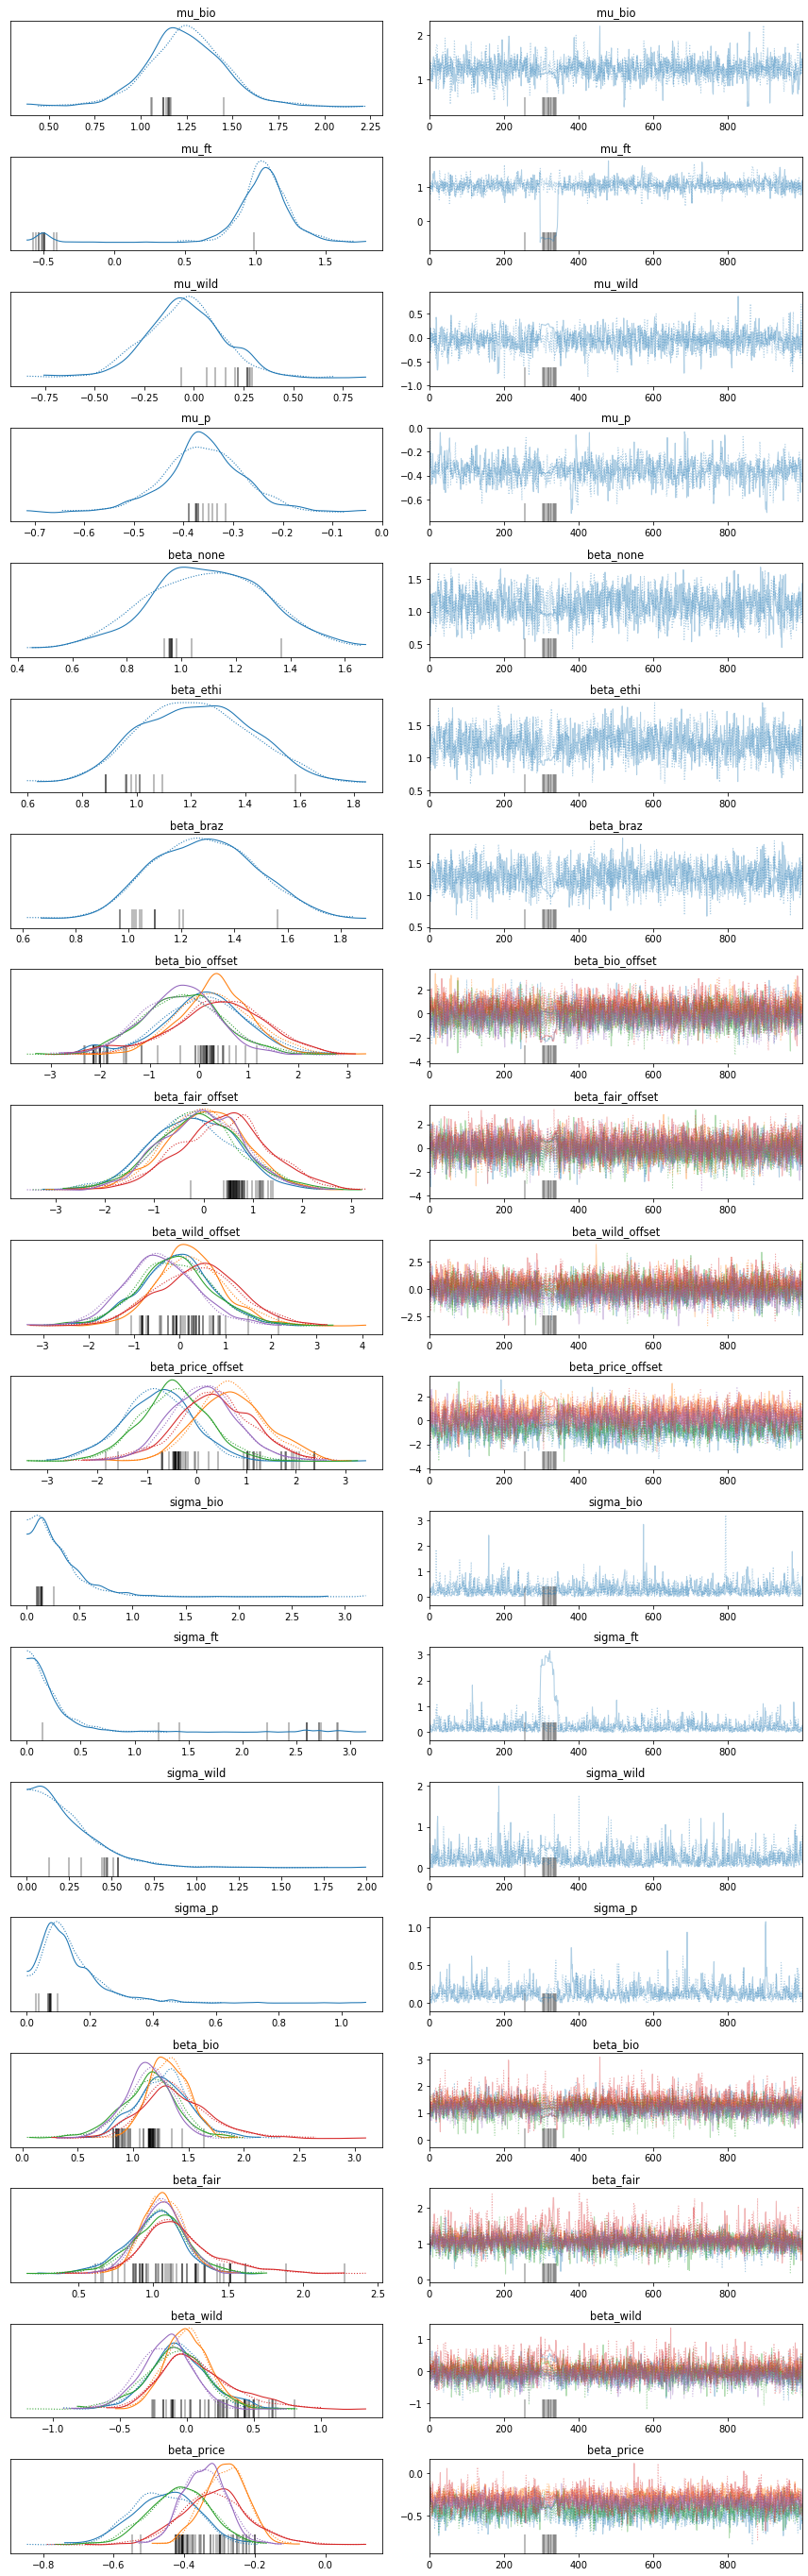

In [17]:
pm.plot_trace(educ_hierarchical_trace);
plt.tight_layout()

<div style="background-color:#FFF0F5">


### 4.3.3 Model by age

In [18]:
with pm.Model() as hierarchical_model_age:
    
    # Hyperprior
    mu_bio = pm.Normal('mu_bio', mu=0., sigma=5)
    sigma_bio = pm.HalfCauchy('sigma_bio', beta=1)
    mu_ft = pm.Normal('mu_ft', mu=0., sigma=5)
    sigma_ft = pm.HalfCauchy('sigma_ft', beta=1)
    mu_wild = pm.Normal('mu_wild', mu=0., sigma=5)
    sigma_wild = pm.HalfCauchy('sigma_wild', beta=1)
    mu_p = pm.Normal('mu_p', mu=0., sigma=5)
    sigma_p = pm.HalfCauchy('sigma_p', beta=1)
    
    # Prior distributions for the parameters
    # intercept = pm.Normal('intercept', mu=0., sigma=10.)  # intercepts don't make sense in this model unless you only turn it on for the "no coffee option"
    beta_none = pm.Normal('beta_none', mu=0., sigma=5.)
    beta_ethi = pm.Normal('beta_ethi', mu=0., sigma=5.)
    beta_braz = pm.Normal('beta_braz', mu=0., sigma=5.)

    #Colombia as standardized
    beta_bio_offset = pm.Normal('beta_bio_offset',mu = 0., sigma = 1., shape = len(coffee.age.unique())) 
    beta_bio = pm.Deterministic('beta_bio', mu_bio+sigma_bio*beta_bio_offset)
    
    beta_fair_offset = pm.Normal('beta_fair_offset',mu = 0., sigma = 1., shape = len(coffee.age.unique())) 
    beta_fair = pm.Deterministic('beta_fair', mu_ft+sigma_ft*beta_fair_offset)
    
    beta_wild_offset = pm.Normal('beta_wild_offset',mu = 0., sigma = 1., shape = len(coffee.age.unique())) 
    beta_wild = pm.Deterministic('beta_wild', mu_wild+sigma_wild*beta_wild_offset)
    
    beta_price_offset = pm.Normal('beta_price_offset',mu = 0., sigma = 1., shape = len(coffee.age.unique())) 
    beta_price = pm.Deterministic('beta_price', mu_p+sigma_p*beta_price_offset)
    
    def loglike(choice, beta_braz, beta_ethi, beta_none, beta_bio, beta_fair, beta_wild, beta_price):
        
        V = beta_braz*coffee['origin_brazil']+ beta_ethi*coffee['origin_ethiopian']+ beta_none*coffee['origin_none']\
            +beta_bio[coffee.age] * coffee['certified_bio'] + beta_fair[coffee.age] * coffee['certified_fair_trade']+ beta_wild[coffee.age] * \
            coffee['certified_wild']+ beta_price[coffee.age] * coffee['price']
    
        exp_v = T.exp(V)
        choice_exp_v = choice*exp_v
                  
        denom = T.bincount(choice_index, weights = exp_v) 
        num = T.bincount(choice_index, weights = choice_exp_v) 
        
        prob = num/denom
        loglike = T.sum(T.log(prob))
        return loglike
        
    choice_like = pm.DensityDist('logit', beta_braz, beta_ethi, beta_none, beta_bio,
                    beta_fair, beta_wild, beta_price, logp=loglike, observed=coffee.choice)

In [19]:
with hierarchical_model_age:
    age_hierarchical_trace = pm.sample(tune=6000, target_accept=.95, return_inferencedata= True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_bio, sigma_bio, mu_ft, sigma_ft, mu_wild, sigma_wild, mu_p, sigma_p, beta_none, beta_ethi, beta_braz, beta_bio_offset, beta_fair_offset, beta_wild_offset, beta_price_offset]


Sampling 2 chains for 6_000 tune and 1_000 draw iterations (12_000 + 2_000 draws total) took 402 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


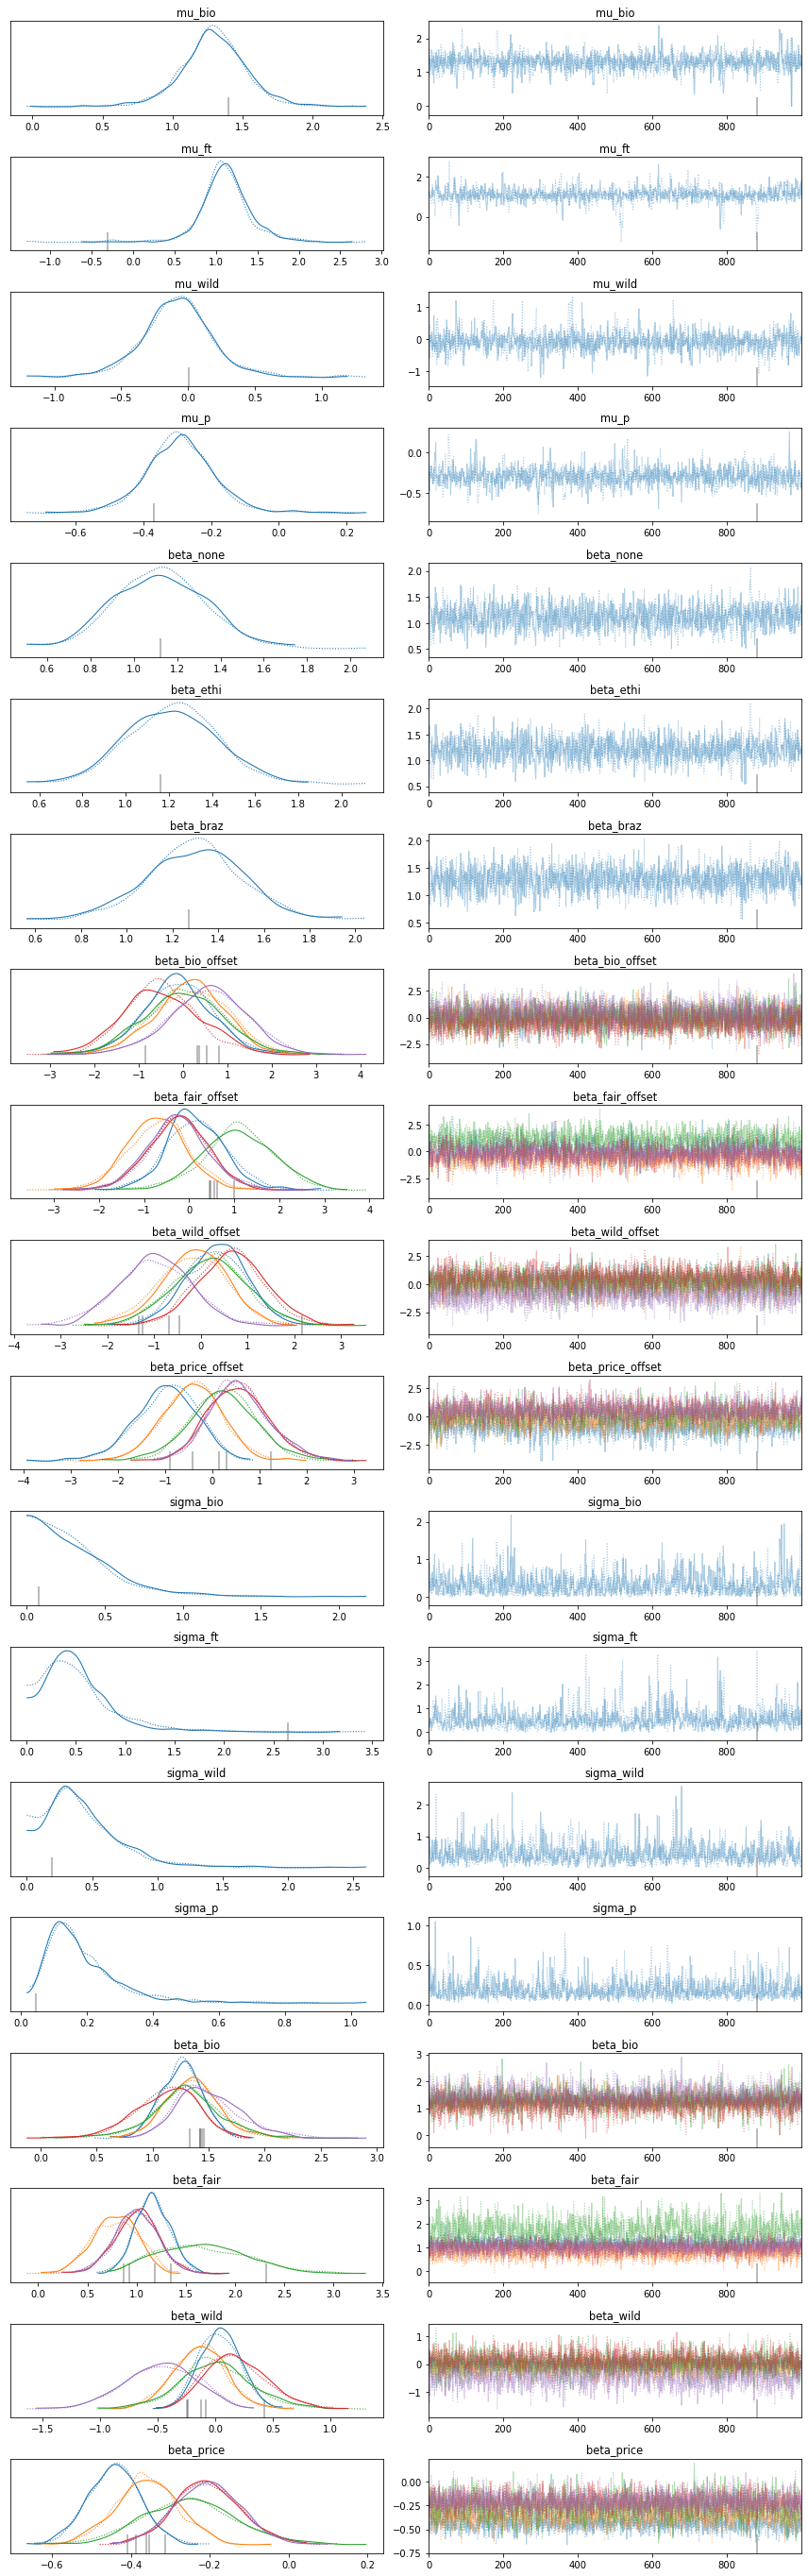

In [20]:
pm.plot_trace(age_hierarchical_trace);
plt.tight_layout()

<div style="background-color:#FFF0F5">


### 4.3.4 Model by gender

In [21]:
coffee['gender'] = coffee['q15']
coffee.head()
# ==1 if is male

index  certified_bio  certified_fair_trade  certified_wild  id  \
0      0              0                     0               0   1   
1      0              1                     0               1   1   
2      1              0                     0               0   1   
3      2              1                     1               0   1   
4      4              1                     0               1   1   

   origin_brazil  origin_ethiopian  origin_none  version  choice  ...  q18e  \
0              0                 0            0        1       1  ...     0   
1              0                 1            0        1       0  ...     0   
2              0                 1            0        1       0  ...     0   
3              0                 0            1        1       0  ...     0   
4              0                 1            0        1       0  ...     0   

   q19a  q19b  q19c  q19d  q19e  edu  age  income  gender  
0     1     0     0     0     0    0    0       0       1  
1     1     0     0     0     0    0    0       0       1  
2     1     0     0     0     0    0    0       0       1  
3     1     0     0     0     0    0    0       0       1  
4     1     0     0     0     0    0    0       0       1  

[5 rows x 58 columns]

In [22]:
with pm.Model() as hierarchical_model_gender:
    
    # Hyperprior
    mu_bio = pm.Normal('mu_bio', mu=0., sigma=5)
    sigma_bio = pm.HalfCauchy('sigma_bio', beta=1)
    mu_ft = pm.Normal('mu_ft', mu=0., sigma=5)
    sigma_ft = pm.HalfCauchy('sigma_ft', beta=1)
    mu_wild = pm.Normal('mu_wild', mu=0., sigma=5)
    sigma_wild = pm.HalfCauchy('sigma_wild', beta=1)
    mu_p = pm.Normal('mu_p', mu=0., sigma=5)
    sigma_p = pm.HalfCauchy('sigma_p', beta=1)
    
    
    # Prior distributions for the parameters
    # intercept = pm.Normal('intercept', mu=0., sigma=10.)  # intercepts don't make sense in this model unless you only turn it on for the "no coffee option"
    beta_none = pm.Normal('beta_none', mu=0., sigma=5.)
    beta_ethi = pm.Normal('beta_ethi', mu=0., sigma=5.)
    beta_braz = pm.Normal('beta_braz', mu=0., sigma=5.)

    #Colombia as standardized
    beta_bio_offset = pm.Normal('beta_bio_offset',mu = 0., sigma = 1., shape = len(coffee.gender.unique())) 
    beta_bio = pm.Deterministic('beta_bio', mu_bio+sigma_bio*beta_bio_offset)
    
    beta_fair_offset = pm.Normal('beta_fair_offset',mu = 0., sigma = 1., shape = len(coffee.gender.unique())) 
    beta_fair = pm.Deterministic('beta_fair', mu_ft+sigma_ft*beta_fair_offset)
    
    beta_wild_offset = pm.Normal('beta_wild_offset',mu = 0., sigma = 1., shape = len(coffee.gender.unique())) 
    beta_wild = pm.Deterministic('beta_wild', mu_wild+sigma_wild*beta_wild_offset)
    
    beta_price_offset = pm.Normal('beta_price_offset',mu = 0., sigma = 1., shape = len(coffee.gender.unique())) 
    beta_price = pm.Deterministic('beta_price', mu_p+sigma_p*beta_price_offset)
    
    
    def loglike(choice, beta_braz, beta_ethi, beta_none, beta_bio, beta_fair, beta_wild, beta_price):
        
        V = beta_braz*coffee['origin_brazil']+ beta_ethi*coffee['origin_ethiopian']+ beta_none*coffee['origin_none']\
            +beta_bio[coffee.gender] * coffee['certified_bio'] + beta_fair[coffee.gender] * coffee['certified_fair_trade']+ beta_wild[coffee.gender] * \
            coffee['certified_wild']+beta_price[coffee.gender] * coffee['price']
    
        exp_v = T.exp(V)
        choice_exp_v = choice*exp_v
                  
        denom = T.bincount(choice_index, weights = exp_v) 
        num = T.bincount(choice_index, weights = choice_exp_v) 
        
        prob = num/denom
        loglike = T.sum(T.log(prob))
        return loglike
        
    choice_like = pm.DensityDist('logit', beta_braz, beta_ethi, beta_none, beta_bio,
                    beta_fair, beta_wild, beta_price, logp=loglike, observed=coffee.choice)

In [23]:
with hierarchical_model_gender:
    gender_hierarchical_trace = pm.sample(tune=6000, target_accept=.95, return_inferencedata= True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_bio, sigma_bio, mu_ft, sigma_ft, mu_wild, sigma_wild, mu_p, sigma_p, beta_none, beta_ethi, beta_braz, beta_bio_offset, beta_fair_offset, beta_wild_offset, beta_price_offset]


Sampling 2 chains for 6_000 tune and 1_000 draw iterations (12_000 + 2_000 draws total) took 1215 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


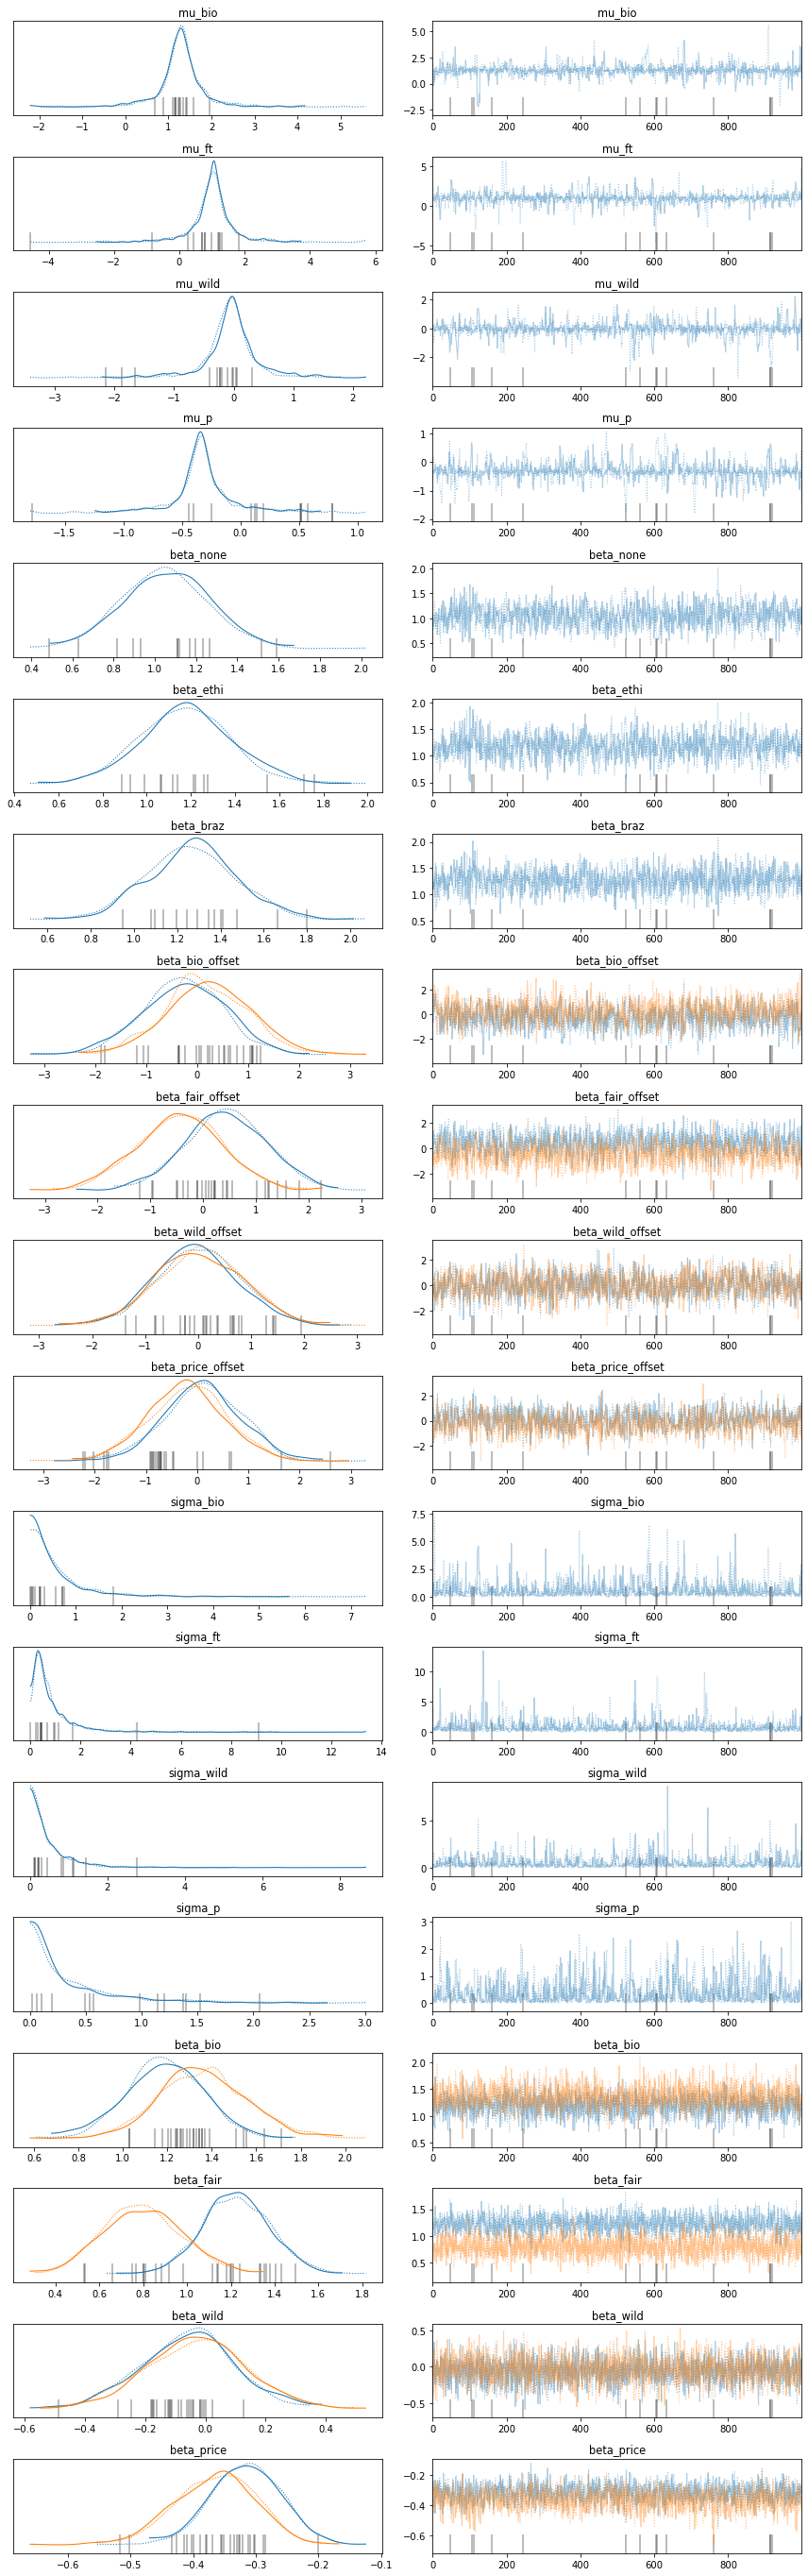

In [24]:
pm.plot_trace(gender_hierarchical_trace);
plt.tight_layout()

<div style="background-color:#FFF0F5">


### 4.3.5 Pooled model

In [25]:
with pm.Model() as model:
    
    # Prior distributions for the parameters
    # intercept = pm.Normal('intercept', mu=0., sigma=10.)  # intercepts don't make sense in this model unless you only turn it on for the "no coffee option"
    beta_ethi = pm.Normal('beta_ethi', mu=0., sigma=5.)
    beta_braz = pm.Normal('beta_braz', mu=0., sigma=5.)
    beta_none = pm.Normal('beta_none', mu=0., sigma=5.)
    #Colombia as standardized
    beta_bio = pm.Normal('beta_bio', mu=0., sigma=5.)
    beta_fair = pm.Normal('beta_fair', mu=0., sigma=5.)
    beta_wild = pm.Normal('beta_wild', mu=0., sigma=5.)
    beta_price = pm.Normal('beta_price', mu=0., sigma=5.)
    
    WTP_bio = pm.Deterministic('WTP_bio', -beta_bio / beta_price)
    WTP_ft = pm.Deterministic('WTP_ft', -beta_fair / beta_price)
    WTP_wild = pm.Deterministic('WTP_wild', -beta_wild / beta_price)
    
    def loglike(choice, beta_braz, beta_ethi, beta_none, beta_bio, beta_fair, beta_wild, beta_price):
        V = beta_braz*coffee['origin_brazil']+ beta_ethi*coffee['origin_ethiopian']+ beta_none*coffee['origin_none']\
            +beta_bio*coffee['certified_bio'] + beta_fair* coffee['certified_fair_trade']+ beta_wild * \
            coffee['certified_wild']+ beta_price* coffee['price']
    
        exp_v = T.exp(V)
        choice_exp_v = choice*exp_v
        denom = T.bincount(choice_index, weights = exp_v) 
        num = T.bincount(choice_index, weights = choice_exp_v) 
        
        prob = num/denom
        loglike = T.sum(T.log(prob))
        return loglike
         
    choice_like = pm.DensityDist('logit', beta_braz, beta_ethi, beta_none, beta_bio,
                    beta_fair, beta_wild, beta_price, logp=loglike, observed=coffee.choice)

In [26]:
with model:
    pooled_trace = pm.sample(tune=6000, target_accept=.95, return_inferencedata= True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_ethi, beta_braz, beta_none, beta_bio, beta_fair, beta_wild, beta_price]


Sampling 2 chains for 6_000 tune and 1_000 draw iterations (12_000 + 2_000 draws total) took 80 seconds.


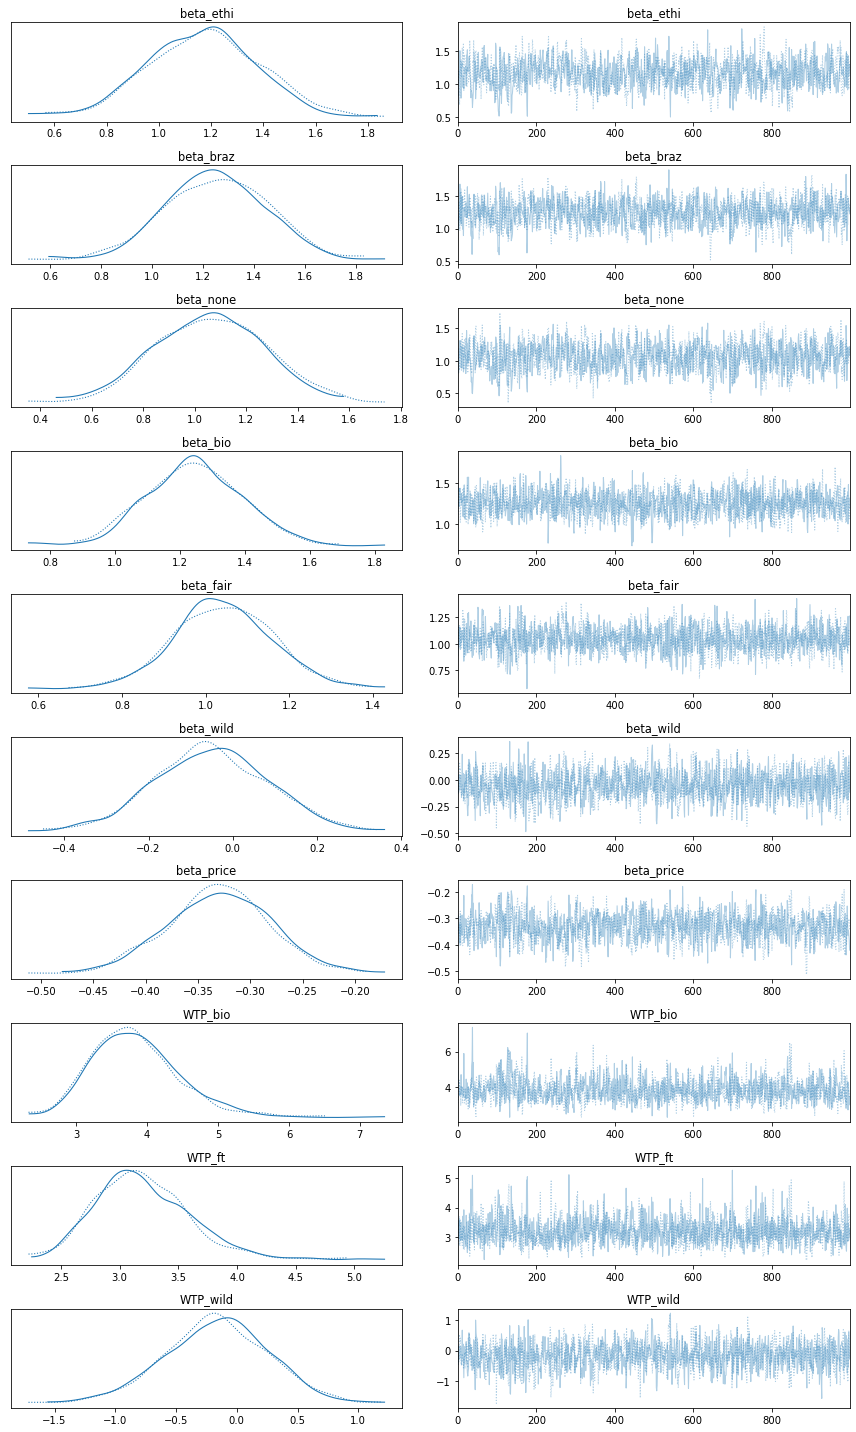

In [27]:
pm.plot_trace(pooled_trace);
plt.tight_layout()

<div style="background-color:#F4C2C2">

# 5 Result & discussion


<div style="background-color:#F4C2C2">

### 5.1 Convergence discussion

All traces show convergence with rhat around 1.0. Before applying 'uncentered' approach to the hierarchical models, there are divergences in the centered model. The reason is the heterogeneity within posterior isn't that significant for wild_label. Thue, using uncentered model will avoid tunning and divergences. The rhat of each model is shown below. 

### 5.1.1 income hierarchical model

In [28]:
pm.summary(income_hierarchical_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
mu_bio                1.294  0.283   0.759    1.803      0.010    0.007   
mu_ft                 1.061  0.191   0.693    1.403      0.006    0.004   
mu_wild              -0.101  0.204  -0.500    0.251      0.005    0.004   
mu_p                 -0.319  0.092  -0.479   -0.155      0.003    0.002   
beta_none             1.087  0.214   0.661    1.459      0.006    0.004   
beta_ethi             1.205  0.213   0.811    1.592      0.006    0.004   
beta_braz             1.275  0.204   0.888    1.642      0.005    0.003   
beta_bio_offset[0]   -0.440  0.716  -1.831    0.835      0.022    0.016   
beta_bio_offset[1]    0.620  0.784  -0.991    2.058      0.021    0.015   
beta_bio_offset[2]   -0.053  0.718  -1.383    1.309      0.018    0.015   
beta_bio_offset[3]   -0.711  0.777  -2.112    0.732      0.024    0.017   
beta_bio_offset[4]    0.590  0.764  -0.853    2.102      0.023    0.016   
beta_fair_offset[0]  -0.425  0.808  -1.931    1.174      0.021    0.016   
beta_fair_offset[1]   0.340  0.833  -1.338    1.780      0.019    0.016   
beta_fair_offset[2]  -0.198  0.813  -1.719    1.336      0.021    0.017   
beta_fair_offset[3]   0.576  0.890  -1.161    2.246      0.021    0.019   
beta_fair_offset[4]  -0.266  0.845  -1.760    1.359      0.021    0.020   
beta_wild_offset[0]   0.206  0.791  -1.297    1.692      0.020    0.017   
beta_wild_offset[1]   0.475  0.873  -1.179    2.041      0.022    0.017   
beta_wild_offset[2]  -0.310  0.847  -1.929    1.305      0.020    0.018   
beta_wild_offset[3]  -0.490  0.874  -2.255    1.056      0.024    0.019   
beta_wild_offset[4]   0.148  0.832  -1.448    1.673      0.019    0.019   
beta_price_offset[0] -0.689  0.669  -1.957    0.567      0.019    0.014   
beta_price_offset[1] -0.114  0.695  -1.512    1.140      0.019    0.015   
beta_price_offset[2]  0.972  0.714  -0.257    2.348      0.020    0.014   
beta_price_offset[3] -0.368  0.717  -1.629    1.021      0.019    0.015   
beta_price_offset[4]  0.210  0.709  -1.162    1.507      0.018    0.015   
sigma_bio             0.430  0.314   0.000    0.935      0.012    0.009   
sigma_ft              0.262  0.228   0.000    0.658      0.009    0.006   
sigma_wild            0.258  0.225   0.000    0.638      0.008    0.005   
sigma_p               0.147  0.102   0.004    0.324      0.004    0.003   
beta_bio[0]           1.134  0.214   0.742    1.540      0.005    0.004   
beta_bio[1]           1.555  0.284   1.068    2.104      0.008    0.006   
beta_bio[2]           1.275  0.245   0.857    1.780      0.005    0.004   
beta_bio[3]           0.997  0.316   0.420    1.552      0.009    0.007   
beta_bio[4]           1.549  0.284   1.029    2.058      0.008    0.006   
beta_fair[0]          0.951  0.170   0.622    1.262      0.004    0.003   
beta_fair[1]          1.160  0.210   0.799    1.581      0.006    0.004   
beta_fair[2]          1.007  0.182   0.629    1.329      0.004    0.003   
beta_fair[3]          1.234  0.254   0.808    1.725      0.007    0.005   
beta_fair[4]          0.985  0.198   0.592    1.338      0.004    0.003   
beta_wild[0]         -0.045  0.176  -0.374    0.287      0.004    0.003   
beta_wild[1]          0.042  0.238  -0.362    0.522      0.006    0.004   
beta_wild[2]         -0.184  0.214  -0.576    0.228      0.005    0.004   
beta_wild[3]         -0.254  0.258  -0.764    0.199      0.007    0.005   
beta_wild[4]         -0.058  0.211  -0.476    0.316      0.005    0.004   
beta_price[0]        -0.405  0.068  -0.530   -0.277      0.002    0.001   
beta_price[1]        -0.336  0.078  -0.487   -0.195      0.002    0.001   
beta_price[2]        -0.197  0.085  -0.349   -0.035      0.002    0.002   
beta_price[3]        -0.372  0.088  -0.551   -0.221      0.002    0.002   
beta_price[4]        -0.291  0.080  -0.443   -0.136      0.002    0.001   

                      ess_bulk  ess_tail  r_hat  
mu_bio                  1036.0     961.0    1.0  
mu_ft                 

### 5.1.2 education hierarchical model

In [29]:
pm.summary(educ_hierarchical_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
mu_bio                1.243  0.221   0.826    1.657      0.007    0.005   
mu_ft                 1.033  0.286   0.743    1.458      0.037    0.027   
mu_wild              -0.049  0.200  -0.417    0.316      0.006    0.005   
mu_p                 -0.359  0.088  -0.527   -0.187      0.003    0.002   
beta_none             1.100  0.209   0.712    1.491      0.006    0.004   
beta_ethi             1.220  0.206   0.877    1.625      0.008    0.005   
beta_braz             1.287  0.195   0.957    1.658      0.006    0.004   
beta_bio_offset[0]    0.095  0.889  -1.645    1.777      0.048    0.040   
beta_bio_offset[1]    0.302  0.788  -1.144    1.811      0.021    0.017   
beta_bio_offset[2]   -0.336  0.845  -1.929    1.268      0.020    0.018   
beta_bio_offset[3]    0.391  0.970  -1.445    2.322      0.055    0.039   
beta_bio_offset[4]   -0.405  0.781  -1.845    1.083      0.020    0.016   
beta_fair_offset[0]  -0.222  0.880  -1.932    1.348      0.023    0.018   
beta_fair_offset[1]   0.027  0.819  -1.587    1.498      0.022    0.017   
beta_fair_offset[2]  -0.114  0.897  -1.922    1.551      0.020    0.020   
beta_fair_offset[3]   0.402  0.932  -1.371    2.086      0.021    0.019   
beta_fair_offset[4]  -0.052  0.830  -1.533    1.560      0.021    0.017   
beta_wild_offset[0]  -0.080  0.804  -1.545    1.471      0.018    0.017   
beta_wild_offset[1]   0.229  0.783  -1.153    1.751      0.021    0.016   
beta_wild_offset[2]  -0.122  0.858  -1.748    1.445      0.019    0.019   
beta_wild_offset[3]   0.393  0.916  -1.234    2.200      0.019    0.018   
beta_wild_offset[4]  -0.449  0.791  -1.873    1.114      0.019    0.015   
beta_price_offset[0] -0.794  0.724  -2.187    0.505      0.022    0.016   
beta_price_offset[1]  0.699  0.704  -0.600    2.036      0.029    0.026   
beta_price_offset[2] -0.440  0.716  -1.855    0.857      0.022    0.015   
beta_price_offset[3]  0.355  0.789  -1.153    1.868      0.024    0.017   
beta_price_offset[4]  0.141  0.693  -1.160    1.476      0.019    0.015   
sigma_bio             0.279  0.257   0.000    0.694      0.008    0.006   
sigma_ft              0.253  0.393   0.000    0.635      0.051    0.039   
sigma_wild            0.240  0.206   0.000    0.595      0.008    0.006   
sigma_p               0.136  0.100   0.000    0.300      0.004    0.003   
beta_bio[0]           1.280  0.249   0.798    1.711      0.010    0.007   
beta_bio[1]           1.320  0.182   0.993    1.666      0.004    0.003   
beta_bio[2]           1.140  0.269   0.650    1.667      0.007    0.005   
beta_bio[3]           1.385  0.328   0.794    2.007      0.013    0.009   
beta_bio[4]           1.131  0.209   0.728    1.510      0.005    0.004   
beta_fair[0]          1.006  0.193   0.616    1.350      0.005    0.004   
beta_fair[1]          1.065  0.139   0.790    1.319      0.003    0.002   
beta_fair[2]          1.037  0.206   0.646    1.447      0.005    0.003   
beta_fair[3]          1.179  0.266   0.666    1.679      0.010    0.007   
beta_fair[4]          1.054  0.152   0.787    1.361      0.003    0.002   
beta_wild[0]         -0.065  0.221  -0.473    0.373      0.011    0.008   
beta_wild[1]          0.004  0.167  -0.315    0.308      0.005    0.004   
beta_wild[2]         -0.087  0.238  -0.558    0.344      0.007    0.005   
beta_wild[3]          0.073  0.282  -0.366    0.687      0.013    0.009   
beta_wild[4]         -0.163  0.195  -0.540    0.178      0.005    0.004   
beta_price[0]        -0.458  0.090  -0.633   -0.309      0.003    0.002   
beta_price[1]        -0.283  0.061  -0.397   -0.171      0.002    0.001   
beta_price[2]        -0.415  0.086  -0.574   -0.258      0.003    0.002   
beta_price[3]        -0.313  0.100  -0.506   -0.131      0.003    0.002   
beta_price[4]        -0.342  0.062  -0.462   -0.235      0.002    0.001   

                      ess_bulk  ess_tail  r_hat  
mu_bio                  1141.0    1022.0   1.00  
mu_ft                 

### 5.1.3 age hierarchical model

In [30]:
pm.summary(age_hierarchical_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
mu_bio                1.293  0.245   0.851    1.774      0.008    0.006   
mu_ft                 1.109  0.338   0.567    1.770      0.013    0.009   
mu_wild              -0.078  0.291  -0.671    0.445      0.010    0.007   
mu_p                 -0.292  0.106  -0.502   -0.105      0.003    0.002   
beta_none             1.122  0.213   0.728    1.513      0.006    0.004   
beta_ethi             1.215  0.211   0.837    1.627      0.006    0.004   
beta_braz             1.299  0.207   0.903    1.692      0.005    0.004   
beta_bio_offset[0]   -0.125  0.790  -1.673    1.325      0.019    0.017   
beta_bio_offset[1]    0.173  0.840  -1.305    1.844      0.018    0.018   
beta_bio_offset[2]    0.017  0.922  -1.749    1.666      0.022    0.023   
beta_bio_offset[3]   -0.486  0.860  -2.010    1.195      0.020    0.017   
beta_bio_offset[4]    0.559  0.907  -1.204    2.199      0.023    0.018   
beta_fair_offset[0]   0.150  0.695  -1.149    1.467      0.019    0.018   
beta_fair_offset[1]  -0.704  0.691  -1.962    0.611      0.020    0.014   
beta_fair_offset[2]   1.084  0.804  -0.402    2.606      0.021    0.015   
beta_fair_offset[3]  -0.242  0.682  -1.610    0.957      0.018    0.014   
beta_fair_offset[4]  -0.240  0.693  -1.602    1.041      0.019    0.016   
beta_wild_offset[0]   0.322  0.685  -1.002    1.568      0.019    0.015   
beta_wild_offset[1]  -0.157  0.730  -1.539    1.243      0.019    0.016   
beta_wild_offset[2]   0.199  0.815  -1.321    1.735      0.020    0.018   
beta_wild_offset[3]   0.646  0.737  -0.704    2.085      0.019    0.014   
beta_wild_offset[4]  -0.979  0.801  -2.480    0.461      0.021    0.015   
beta_price_offset[0] -0.983  0.668  -2.169    0.267      0.019    0.014   
beta_price_offset[1] -0.419  0.646  -1.558    0.825      0.017    0.014   
beta_price_offset[2]  0.234  0.726  -1.094    1.660      0.018    0.015   
beta_price_offset[3]  0.565  0.654  -0.666    1.797      0.017    0.012   
beta_price_offset[4]  0.568  0.654  -0.573    1.894      0.018    0.013   
sigma_bio             0.314  0.266   0.000    0.780      0.011    0.008   
sigma_ft              0.532  0.403   0.002    1.182      0.017    0.012   
sigma_wild            0.428  0.303   0.000    0.910      0.011    0.008   
sigma_p               0.185  0.112   0.024    0.382      0.004    0.003   
beta_bio[0]           1.257  0.186   0.921    1.613      0.004    0.003   
beta_bio[1]           1.355  0.245   0.845    1.782      0.005    0.004   
beta_bio[2]           1.300  0.333   0.687    1.987      0.008    0.006   
beta_bio[3]           1.114  0.284   0.578    1.608      0.008    0.006   
beta_bio[4]           1.503  0.296   1.002    2.095      0.009    0.006   
beta_fair[0]          1.165  0.179   0.810    1.484      0.004    0.003   
beta_fair[1]          0.782  0.233   0.393    1.250      0.007    0.005   
beta_fair[2]          1.683  0.464   0.862    2.485      0.017    0.012   
beta_fair[3]          0.998  0.229   0.565    1.430      0.005    0.003   
beta_fair[4]          1.000  0.221   0.576    1.415      0.005    0.004   
beta_wild[0]          0.038  0.178  -0.299    0.356      0.004    0.003   
beta_wild[1]         -0.140  0.230  -0.561    0.308      0.005    0.004   
beta_wild[2]          0.008  0.325  -0.658    0.606      0.007    0.006   
beta_wild[3]          0.183  0.266  -0.267    0.718      0.007    0.005   
beta_wild[4]         -0.479  0.313  -1.025    0.115      0.010    0.007   
beta_price[0]        -0.443  0.066  -0.567   -0.316      0.002    0.001   
beta_price[1]        -0.360  0.080  -0.503   -0.200      0.002    0.001   
beta_price[2]        -0.252  0.119  -0.468   -0.020      0.003    0.002   
beta_price[3]        -0.206  0.084  -0.362   -0.039      0.002    0.001   
beta_price[4]        -0.206  0.084  -0.378   -0.060      0.002    0.001   

                      ess_bulk  ess_tail  r_hat  
mu_bio                  1109.0     852.0   1.00  
mu_ft                 

### 5.1.4 gender hierarchical model

In [31]:
pm.summary(gender_hierarchical_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
mu_bio                1.292  0.574   0.115    2.279      0.024    0.017   
mu_ft                 0.999  0.751  -0.519    2.503      0.029    0.021   
mu_wild              -0.052  0.481  -0.970    1.039      0.020    0.015   
mu_p                 -0.315  0.308  -1.023    0.333      0.016    0.011   
beta_none             1.054  0.213   0.627    1.430      0.008    0.006   
beta_ethi             1.179  0.211   0.796    1.598      0.007    0.005   
beta_braz             1.267  0.206   0.897    1.654      0.007    0.005   
beta_bio_offset[0]   -0.273  0.817  -1.809    1.259      0.025    0.018   
beta_bio_offset[1]    0.210  0.830  -1.356    1.719      0.025    0.018   
beta_fair_offset[0]   0.441  0.767  -0.886    1.991      0.022    0.016   
beta_fair_offset[1]  -0.439  0.806  -1.972    1.029      0.024    0.017   
beta_wild_offset[0]  -0.015  0.813  -1.376    1.708      0.026    0.018   
beta_wild_offset[1]   0.041  0.837  -1.469    1.645      0.026    0.019   
beta_price_offset[0]  0.102  0.753  -1.345    1.418      0.025    0.018   
beta_price_offset[1] -0.207  0.764  -1.649    1.228      0.025    0.018   
sigma_bio             0.583  0.722   0.000    1.725      0.025    0.017   
sigma_ft              0.840  1.018   0.000    2.261      0.045    0.032   
sigma_wild            0.491  0.623   0.000    1.440      0.021    0.015   
sigma_p               0.372  0.439   0.000    1.242      0.018    0.013   
beta_bio[0]           1.188  0.174   0.870    1.520      0.004    0.003   
beta_bio[1]           1.363  0.200   0.990    1.720      0.004    0.003   
beta_fair[0]          1.225  0.153   0.933    1.506      0.004    0.002   
beta_fair[1]          0.797  0.177   0.485    1.142      0.004    0.003   
beta_wild[0]         -0.059  0.157  -0.370    0.224      0.003    0.003   
beta_wild[1]         -0.032  0.169  -0.337    0.307      0.004    0.003   
beta_price[0]        -0.316  0.056  -0.422   -0.214      0.002    0.001   
beta_price[1]        -0.365  0.064  -0.483   -0.253      0.002    0.001   

                      ess_bulk  ess_tail  r_hat  
mu_bio                   726.0     611.0   1.00  
mu_ft                    838.0     673.0   1.00  
mu_wild                  689.0     507.0   1.00  
mu_p                     453.0     377.0   1.00  
beta_none                753.0    1180.0   1.00  
beta_ethi                821.0     978.0   1.00  
beta_braz                932.0     989.0   1.00  
beta_bio_offset[0]      1031.0    1181.0   1.00  
beta_bio_offset[1]      1111.0    1181.0   1.00  
beta_fair_offset[0]     1208.0    1105.0   1.00  
beta_fair_offset[1]     1093.0    1107.0   1.00  
beta_wild_offset[0]      978.0    1266.0   1.00  
beta_wild_offset[1]     1004.0    1131.0   1.00  
beta_price_offset[0]     882.0    1263.0   1.00  
beta_price_offset[1]     897.0    1347.0   1.00  
sigma_bio                772.0     834.0   1.00  
sigma_ft                 696.0     648.0   1.00  
sigma_wild               736.0     984.0   1.00  
sigma_p                  581.0     739.0   1.01  
beta_bio[0]             2033.0    1534.0   1.00  
beta_bio[1]             1988.0    1842.0   1.00  
beta_fair[0]            1882.0    1150.0   1.00  
beta_fair[1]            1713.0    1255.0   1.00  
beta_wild[0]            2383.0    1902.0   1.00  
beta_wild[1]            2087.0    1779.0   1.00  
beta_price[0]           1131.0    1172.0   1.00  
beta_price[1]           1195.0    1523.0   1.00

### 5.1.5 pooled model

In [32]:
pm.summary(pooled_trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta_ethi   1.168  0.209   0.806    1.563      0.008    0.005     760.0   
beta_braz   1.252  0.199   0.870    1.598      0.006    0.004    1065.0   
beta_none   1.059  0.211   0.644    1.426      0.007    0.005     879.0   
beta_bio    1.245  0.145   0.984    1.514      0.004    0.003    1521.0   
beta_fair   1.044  0.117   0.832    1.275      0.003    0.002    1554.0   
beta_wild  -0.051  0.134  -0.286    0.219      0.004    0.003    1439.0   
beta_price -0.330  0.051  -0.428   -0.239      0.002    0.001     955.0   
WTP_bio     3.838  0.627   2.784    5.053      0.019    0.014    1085.0   
WTP_ft      3.205  0.423   2.522    4.056      0.012    0.008    1358.0   
WTP_wild   -0.166  0.425  -1.009    0.585      0.011    0.009    1431.0   

            ess_tail  r_hat  
beta_ethi      958.0    1.0  
beta_braz     1016.0    1.0  
beta_none      951.0    1.0  
beta_bio      1202.0    1.0  
beta_fair     1298.0    1.0  
beta_wild     1370.0    1.0  
beta_price    1009.0    1.0  
WTP_bio       1254.0    1.0  
WTP_ft        1251.0    1.0  
WTP_wild      1387.0    1.0

<div style="background-color:#F4C2C2">

### 5.2 Model selection
Using WAIC (Widely Applicable Information Criterion), we compare the 5 models above.

In [33]:
pm.compare({'hierarchical_model_income':income_hierarchical_trace,'hierarchical_model_educ':educ_hierarchical_trace,'hierarchical_model_age': age_hierarchical_trace, 'hierarchical_model_gender': gender_hierarchical_trace,'model': pooled_trace},ic='waic')

/opt/conda/lib/python3.10/site-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/arviz/stats/stats.py:1677: UserWarning: The point-wise WAIC is the same with the sum WAIC, please double check
            the Observed RV in your model to make sure it returns element-wise logp.
            
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/arviz/stats/stats.py:1677: UserWarning: The point-wise WAIC is the same with the sum WAIC, please double check
     

rank        waic     p_waic     d_waic  weight  \
hierarchical_model_income     0 -832.186227   9.266539   0.000000     0.2   
hierarchical_model_age        1 -834.116508  12.899299   1.930281     0.2   
hierarchical_model_educ       2 -837.559858   7.305566   5.373630     0.2   
hierarchical_model_gender     3 -840.601955   5.104810   8.415728     0.2   
model                         4 -842.471745   3.237999  10.285517     0.2   

                            se  dse  warning waic_scale  
hierarchical_model_income  0.0  0.0     True        log  
hierarchical_model_age     0.0  0.0     True        log  
hierarchical_model_educ    0.0  0.0     True        log  
hierarchical_model_gender  0.0  0.0     True        log  
model                      0.0  0.0     True        log

<div style="background-color:#F4C2C2">

The preferred model is the hierarchical model by income, with the greatest waic value among the 5 proposed models. The first three models have very similar waic values (-832.765 (by income)>-834.137 (by age)>-834.917 (by education)). The pooled model has the worst waic value, since it fails to capture heterogeneity among consumers. We will look at and compare results from the the hierarchical_model_income and pooled model.

<div style="background-color:#F4C2C2">

### 5.3 General results
In general, labeling effects on fair trade labels and bio labels are positive. We can observe that for every income, education, age, gender group, the parameter on fair trade label and the parameter for bio label are positive, while the parameter on wild label is around zero or even negative. This could be caused by the lack of knowledge for wild label as discussed in the beginning. 

<div style="background-color:#F4C2C2">

### 5.3 Hierarchical models

Best model based on waic:

* Hierarchical income: The hierarchical model by income has the highest waic value. We can observe that the group of people with the highest income level aren't necessarily the group that has the highest parameter for each label. However, the is a general increasing trend in the parameter for labels when income increaes. The heterogeneity for different income groups are more pronounce when it comes to parameter for bio leabel, comparing to fair trade label. The coefficient on income[0] group regarding bio label has a mean of 0.9 while for income[4] group, the mean is around 1.5. It makes sense because organic food is regarded as a healthy lifestyle for people with higher income. Additionally, people with higher income are less sensitive to price change as the income[4] group has a mean on price equals to -0.3 while income[0] group has a mean on price equals to -0.4. There is a noticeable heterogeneity across different income groups.
    
    The trace with WTP for income hierarchical model is shown in the appendix. income group 2 and 4 have the highest WTP for bio labels (around WTP_bio = 5 to 6), compares to WTP_bio = 3.8 in the pooled model; income group 2 has the highest WTP for fair trade labels (around WTP_ft = 3.6 to 5), compares to WTP_ft = 3.2 in the pooled model. There are unignorable heterogeneity within consumers; dispersion for bio_labels among consumers' WTP is greater than that of the fair trade_labels. It is also worth noticing that WTP relates to both label recognition and price sensitivity, which explains why the WTP for different income groups cannot be easily predicted. Notice that the method of calculating WTP for a hierarchical may not be ideal and can be improved if there are more time. The results for WTP are differ slightly each time; the standard deviation on posterior is very large somteims. A possible solution is to take log values in future studies.
    


Interesting findings:

* Hierarchical gender: Hierarchical model by gender does not have a great waic value; it was in fact only slightly better than the pooled model. However, the posterior provides an interesting discovery. The parameter on fair trade coffee differs greatly between male and female. male has a posterior mean around 0.8 while female has a posterior mean around 1.2. This suggests that females pay more attention to social labels.

Other models also show heterogeneity for WTP (which can be implicitly deduced from label coefficients and price coefficients).



<div style="background-color:#F4C2C2">

# 6 Conclusion

The primary objective of this paper is to examine consumers' willingness to pay for various labels. The findings reveal several key insights. Firstly, it is observed that consumers exhibit a higher willingness to pay for the bio label compared to the fair trade label, and both of these labels have a higher willingness to pay compared to the wild label. Interestingly, the wild label does not seem to enjoy significant popularity among consumers.

Secondly, the study identifies substantial heterogeneity among consumers. By grouping consumers based on income, it is found that this categorization aligns well with the observed data and prior expectations. Surprisingly, consumers with higher income do not necessarily exhibit the highest willingness to pay for labels. The willingness to pay for labels is influenced by two factors: the recognition of a specific label (as captured by the parameter on label dummies) and price sensitivity (as indicated by the parameter on price).

Among the different models considered, the income hierarchical model performs the best based on the waic test. However, it is worth noting that the waic values are also relatively close when considering alternative groupings such as age or education. Therefore, exploring the willingness to pay results across different age and education groups would be valuable. Although the explicit calculation of willingness to pay is not provided for all models, it can be reasonably inferred that heterogeneity exists among consumers when they are grouped according to different characteristics, as reflected by the label parameters.
Overall, these findings underscore the importance of considering consumers' willingness to pay for labels and the presence of heterogeneity within consumer preferences, highlighting the influence of label recognition and price sensitivity. Obviously, the wild label is less popular than the other two labels.
    
There are certain limitations to this study that should be acknowledged. Firstly, the study does not provide a detailed analysis of the willingness to pay (WTP) for each hierarchical model. While the coefficients on the label variables can serve as an approximate reference for WTP, they may not provide precise estimates. Nevertheless, these coefficients can still be utilized to compare the WTP for different labels. Secondly, the study does not examine the potential two-way effects or interactions between labels. Exploring the interactions between various labels could offer valuable insights into how consumers' preferences and WTP might be influenced when multiple labels are present simultaneously. Thirdly, if we can collect data from more regions (other countries), we can view this issue from the geometric aspects. Addressing these limitations would enhance the comprehensiveness of the analysis and provide a more nuanced understanding of consumers' WTP for different labels.


<div style="background-color:#FFF0F5">

# 7 Reference

1. Hainmueller,J., Hiscox, M.J., & Sequeira, S. Consumer Demand for Fair Trade: Evidence from a Multistore Field Experiment. 

2. Arnot, Chris, Peter C. Boxall, and Sean Cash (2006) "Do Ethical Consumers Care About Price? A Revealed Preference Analysis of Fair Trade Coffee Purchases," Canadian Journal of Agricultural Economics 54

3. The state of sustainable markets, statistics and emerging trends, international trade center (2020)

4. Green, E.J., & Matarazzo, N.(2018).  The Effects of Consumer Characteristics on Willingess to Pay for Fair trade Coffee. Journal of Consumer Affairs

5. Kroll,S.,&Reyes,C.(2017). The effect of price premiums on the willingness to pay for Fair Trade proeucts: Evidence from a naural field experiment. Food Policy, 68, 1-8.
    
6. Rotaris, L. and R. Danielis (2011). Willingness to Pay for Fair Trade Coffee: A Conjoint Analysis Experiment with Italian Consumers.
    
7. Giovanucci, D, (2001),, "Sustainable Coffee Survey of the North American Specialty Coffee Industry", Commission for Environmental Cooperation, Montreal.
    
8. Deaton, Angus S., and John Muellbauer,(1980) "An Almost Ideal Demand System," American Economic Review

codes are based on 'hierarchical_models' ipynb file from class.


<div style="background-color:#FFF0F5">

# 8 Appendix
    
WTP for hierarchical income model

In [34]:
with pm.Model() as hierarchical_model_income:
    
    
    # Hyperprior
    mu_bio = pm.Normal('mu_bio', mu=0., sigma=5)
    sigma_bio = pm.HalfCauchy('sigma_bio', beta=1)
    mu_ft = pm.Normal('mu_ft', mu=0., sigma=5)
    sigma_ft = pm.HalfCauchy('sigma_ft', beta=1)
    mu_wild = pm.Normal('mu_wild', mu=0., sigma=5)
    sigma_wild = pm.HalfCauchy('sigma_wild', beta=1)
    mu_p = pm.Normal('mu_p', mu=0., sigma=5)
    sigma_p = pm.HalfCauchy('sigma_p', beta=1)
    
    # Prior distributions for the parameters
    beta_none = pm.Normal('beta_none', mu=0., sigma=5.)
    beta_ethi = pm.Normal('beta_ethi', mu=0., sigma=5.)
    beta_braz = pm.Normal('beta_braz', mu=0., sigma=5.)

    #Colombia as standardized
    beta_bio_offset = pm.Normal('beta_bio_offset',mu = 0., sigma = 1., shape = len(coffee.income.unique())) 
    beta_bio = pm.Deterministic('beta_bio', mu_bio+sigma_bio*beta_bio_offset)
    
    beta_fair_offset = pm.Normal('beta_fair_offset',mu = 0., sigma = 1., shape = len(coffee.income.unique())) 
    beta_fair = pm.Deterministic('beta_fair', mu_ft+sigma_ft*beta_fair_offset)
    
    beta_wild_offset = pm.Normal('beta_wild_offset',mu = 0., sigma = 1., shape = len(coffee.income.unique())) 
    beta_wild = pm.Deterministic('beta_wild', mu_wild+sigma_wild*beta_wild_offset)
    
    beta_price_offset = pm.Normal('beta_price_offset',mu = 0., sigma = 1., shape = len(coffee.income.unique())) 
    beta_price = pm.Deterministic('beta_price', mu_p+sigma_p*beta_price_offset)
    
    
    WTP_bio0 = pm.Deterministic('WTP_bio0', -beta_bio[0]/beta_price[0])
    WTP_bio1 = pm.Deterministic('WTP_bio1', -beta_bio[1]/beta_price[1])
    WTP_bio2 = pm.Deterministic('WTP_bio2', -beta_bio[2]/beta_price[2])
    WTP_bio3 = pm.Deterministic('WTP_bio3', -beta_bio[3]/beta_price[3])
    WTP_bio4 = pm.Deterministic('WTP_bio4', -beta_bio[4]/beta_price[4])

    WTP_ft0 = pm.Deterministic('WTP_ft0', -beta_fair[0]/beta_price[0])
    WTP_ft1 = pm.Deterministic('WTP_ft1', -beta_fair[1]/beta_price[1])
    WTP_ft2 = pm.Deterministic('WTP_ft2', -beta_fair[2]/beta_price[2])
    WTP_ft3 = pm.Deterministic('WTP_ft3', -beta_fair[3]/beta_price[3])
    WTP_ft4 = pm.Deterministic('WTP_ft4', -beta_fair[4]/beta_price[4])
    
    WTP_wild0 = pm.Deterministic('WTP_wild0', -beta_wild[0]/beta_price[0])
    WTP_wild1 = pm.Deterministic('WTP_wild1', -beta_wild[1]/beta_price[1])
    WTP_wild2 = pm.Deterministic('WTP_wild2', -beta_wild[2]/beta_price[2])
    WTP_wild3 = pm.Deterministic('WTP_wild3', -beta_wild[3]/beta_price[3])
    WTP_wild4 = pm.Deterministic('WTP_wild4', -beta_wild[4]/beta_price[4])
    
    
    def loglike(choice, beta_braz, beta_ethi, beta_none, beta_bio, beta_fair, beta_wild, beta_price):
        
        V = beta_braz*coffee['origin_brazil']+ beta_ethi*coffee['origin_ethiopian']+ beta_none*coffee['origin_none']\
            +beta_bio[coffee.income] * coffee['certified_bio'] + beta_fair[coffee.income] * coffee['certified_fair_trade']+ beta_wild[coffee.income] * \
            coffee['certified_wild']+ beta_price[coffee.income] * coffee['price']
    
        exp_v = T.exp(V)
        choice_exp_v = choice*exp_v
                  
        denom = T.bincount(choice_index, weights = exp_v) 
        num = T.bincount(choice_index, weights = choice_exp_v) 
        
        prob = num/denom
        loglike = T.sum(T.log(prob))
        return loglike
        
    choice_like = pm.DensityDist('logit', beta_braz, beta_ethi, beta_none, beta_bio,
                    beta_fair, beta_wild, beta_price, logp=loglike, observed=coffee.choice)

In [35]:
with hierarchical_model_income:
    income_hierarchical_trace2 = pm.sample(tune=6000, target_accept=.95, return_inferencedata= True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_bio, sigma_bio, mu_ft, sigma_ft, mu_wild, sigma_wild, mu_p, sigma_p, beta_none, beta_ethi, beta_braz, beta_bio_offset, beta_fair_offset, beta_wild_offset, beta_price_offset]


Sampling 2 chains for 6_000 tune and 1_000 draw iterations (12_000 + 2_000 draws total) took 354 seconds.


In [36]:
income_summary = pm.summary(income_hierarchical_trace2)
pd.options.display.max_rows = None
print(income_summary)

                       mean       sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
mu_bio                1.298    0.263   0.794    1.771      0.008    0.005   
mu_ft                 1.066    0.202   0.698    1.438      0.006    0.004   
mu_wild              -0.092    0.217  -0.515    0.274      0.007    0.006   
mu_p                 -0.321    0.100  -0.506   -0.133      0.003    0.003   
beta_none             1.090    0.215   0.709    1.501      0.005    0.004   
beta_ethi             1.207    0.209   0.864    1.645      0.005    0.004   
beta_braz             1.279    0.196   0.902    1.630      0.005    0.003   
beta_bio_offset[0]   -0.425    0.740  -1.916    0.874      0.018    0.015   
beta_bio_offset[1]    0.661    0.761  -0.865    2.007      0.019    0.014   
beta_bio_offset[2]   -0.091    0.785  -1.531    1.523      0.020    0.017   
beta_bio_offset[3]   -0.674    0.800  -2.059    0.929      0.021    0.015   
beta_bio_offset[4]    0.604    0.771  -0.744    2.103      0.019    0.015   